In [1]:
#loading important libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
#show all rows and columns 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [4]:
#total no. of rows and columns
df.shape

(614, 13)

In [5]:
#name of the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# null data in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#datatypes of columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
#number of unique data in the columns
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:
#fill the null categorical data
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

# fill the null numerical data
df['LoanAmount'].fillna(value=0,inplace=True)
df['Loan_Amount_Term'].fillna(value=0,inplace=True)
df['Credit_History'].fillna(0,inplace=True)

# EDA

                                             |                                             | [  0%]   00:00 ->…


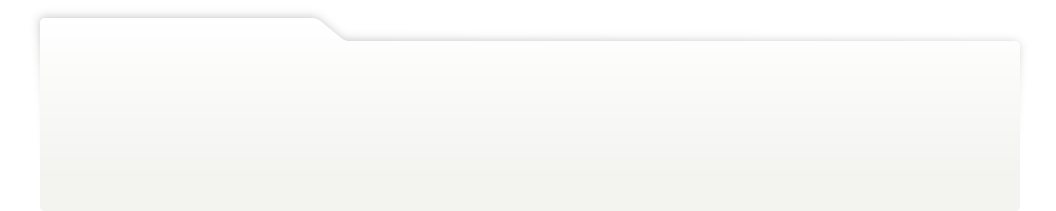
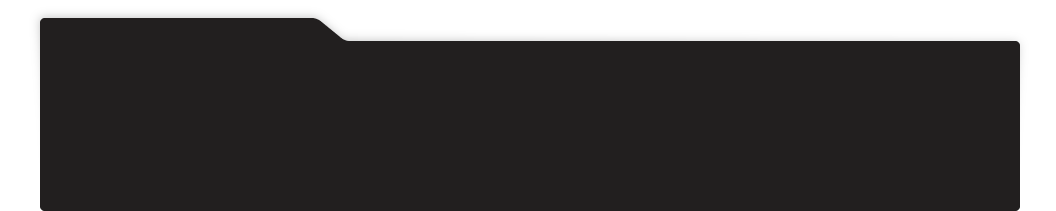
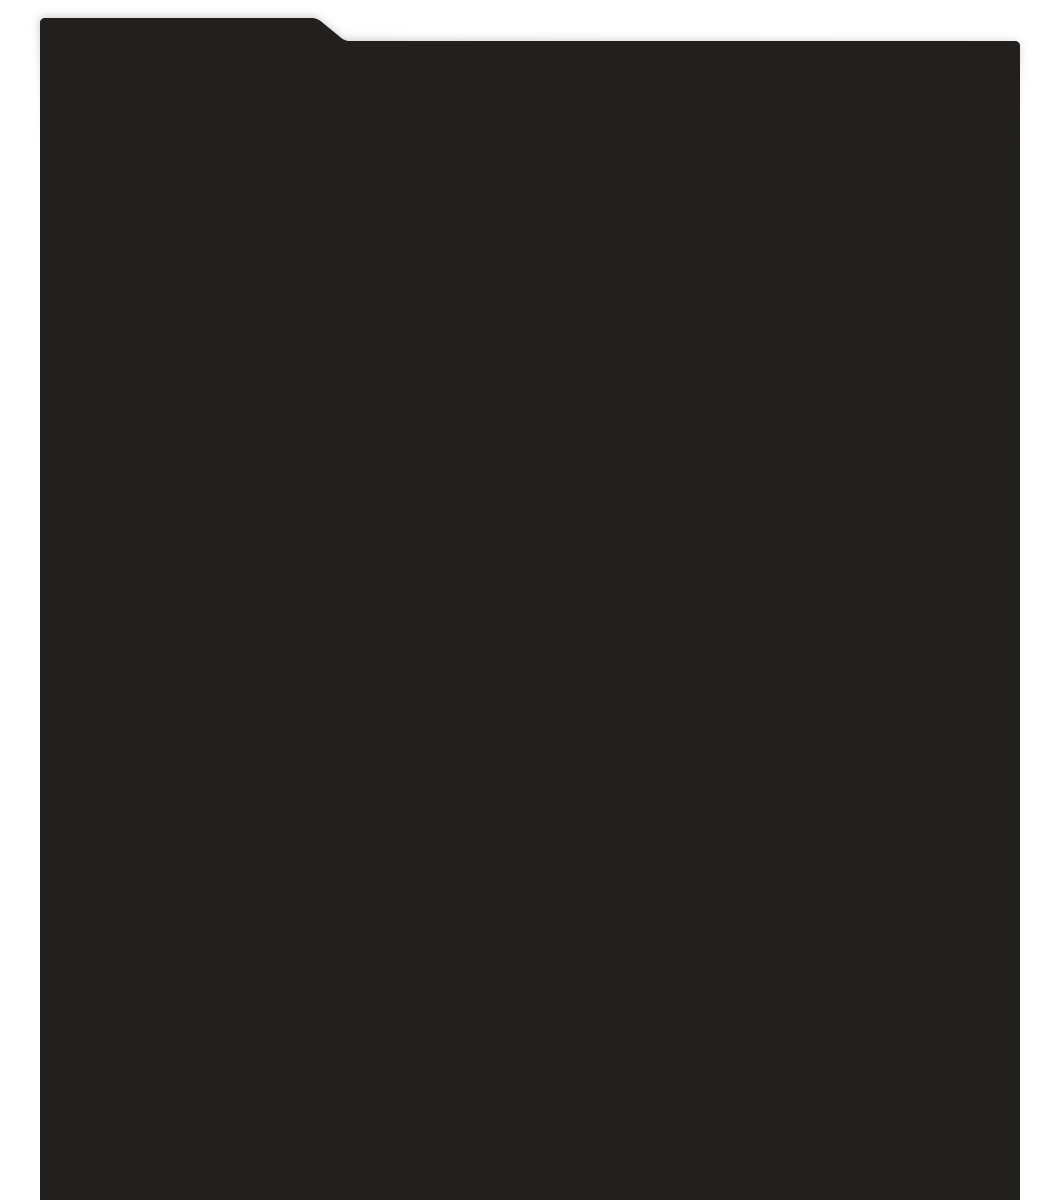
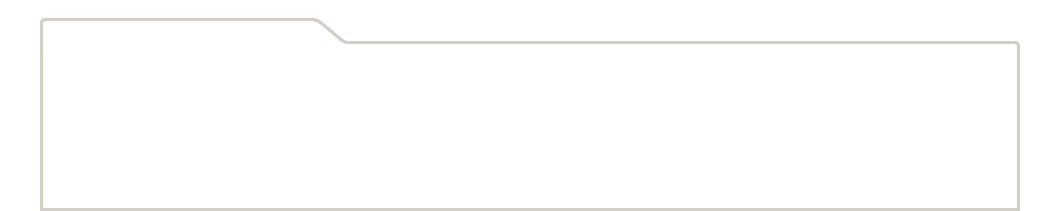
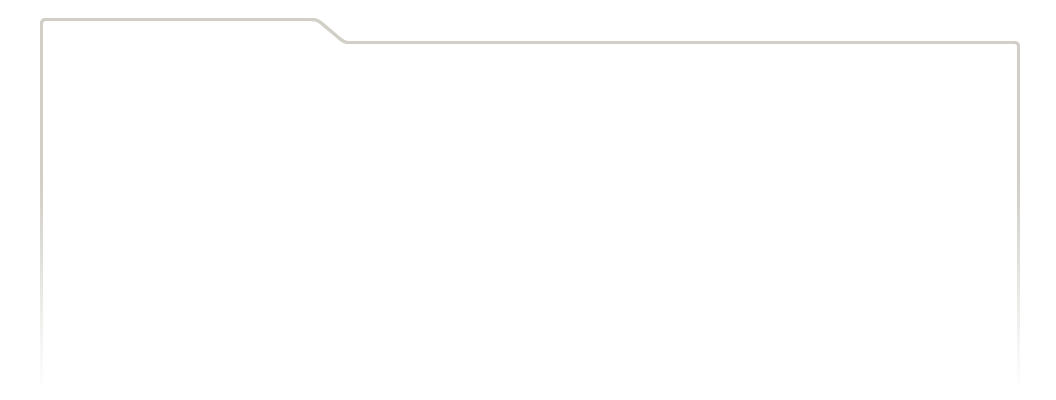
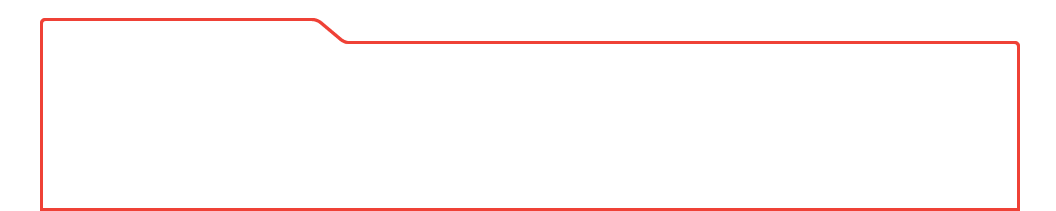
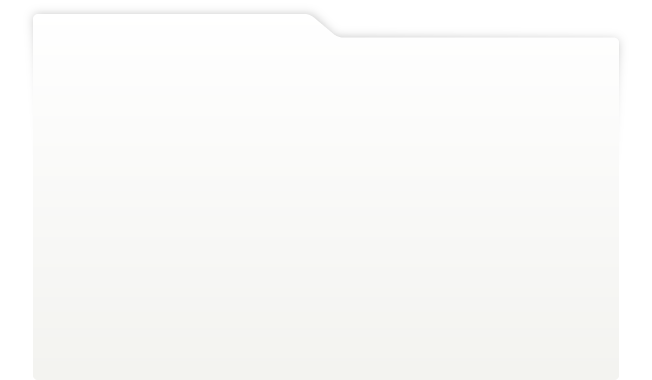
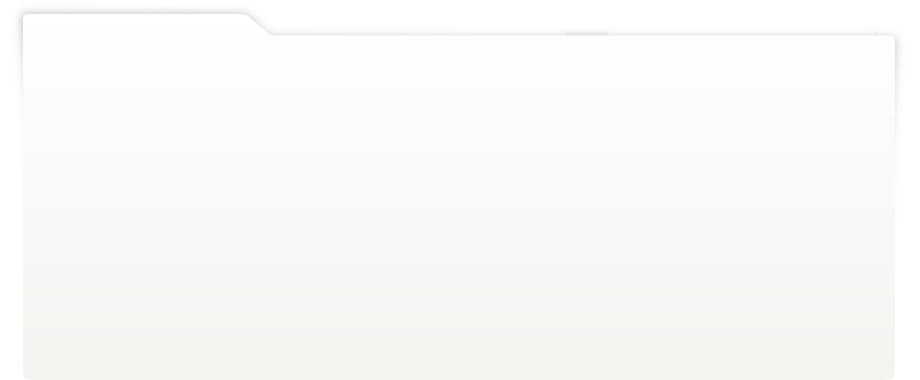
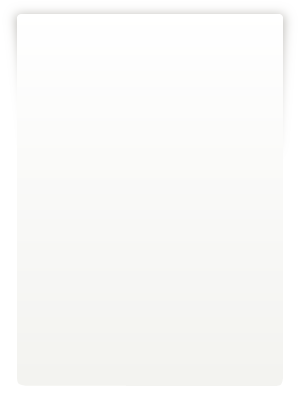
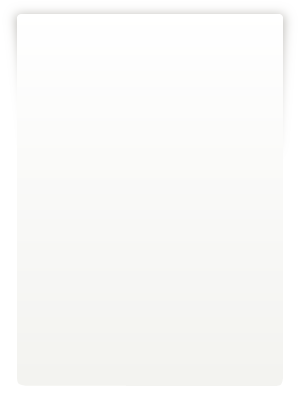
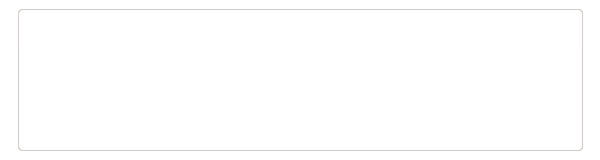
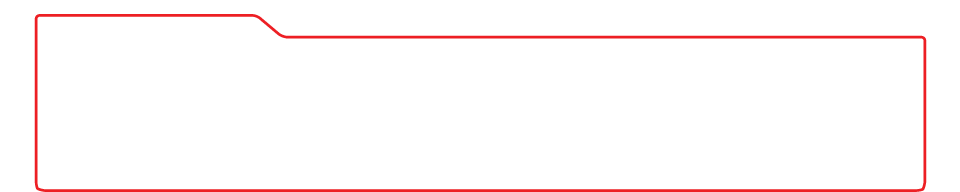
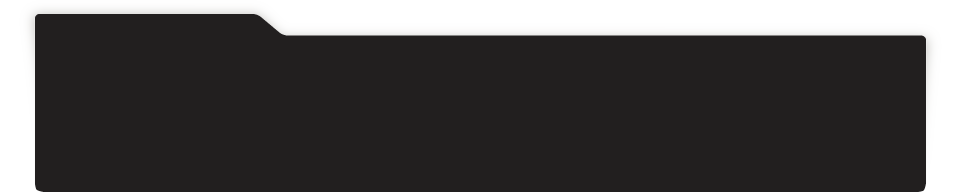
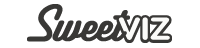
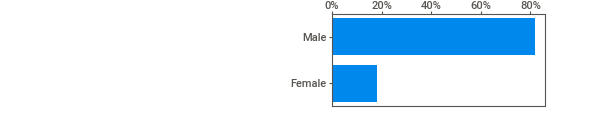
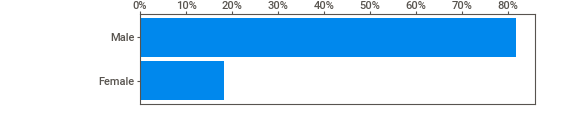
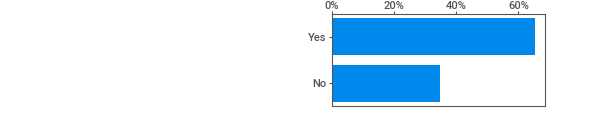
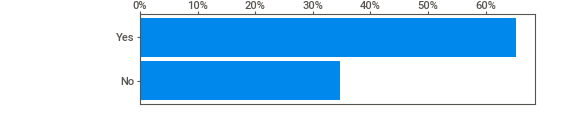
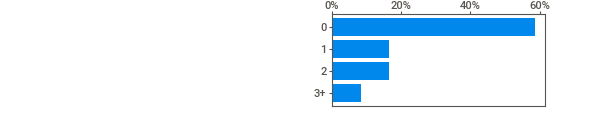
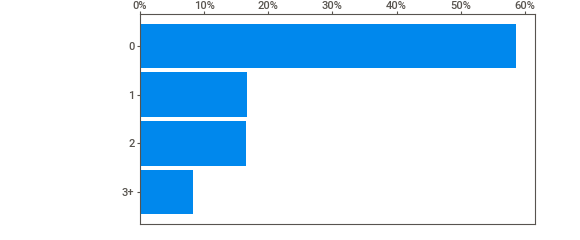
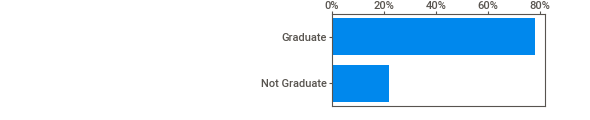
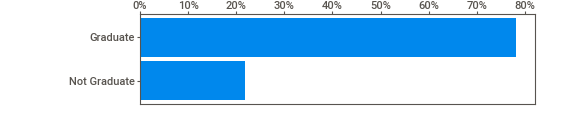
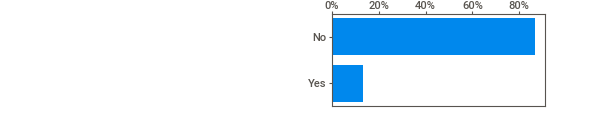
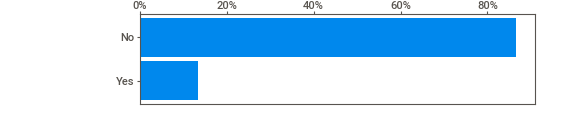
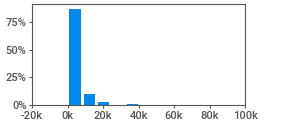
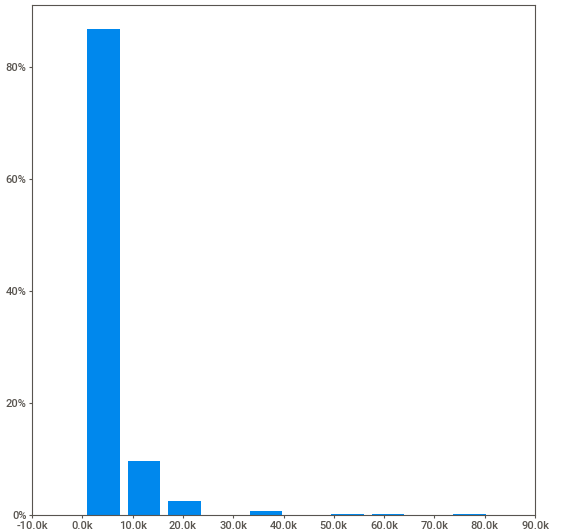
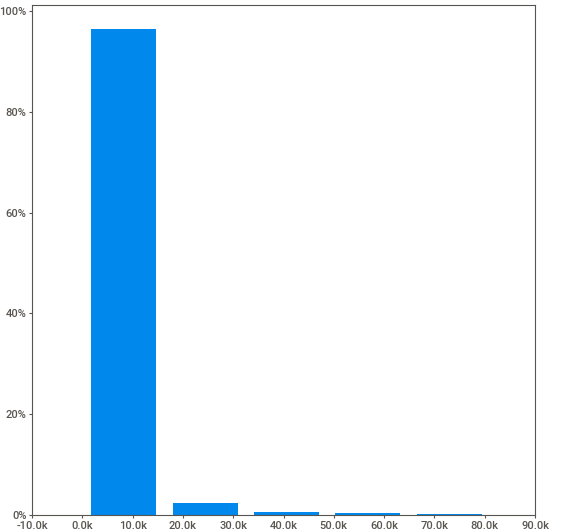
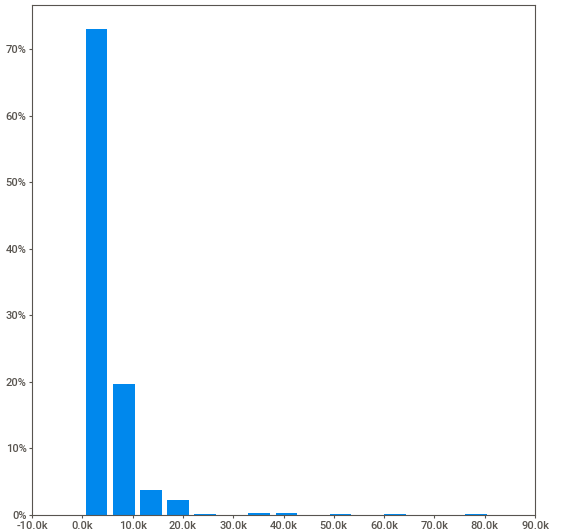
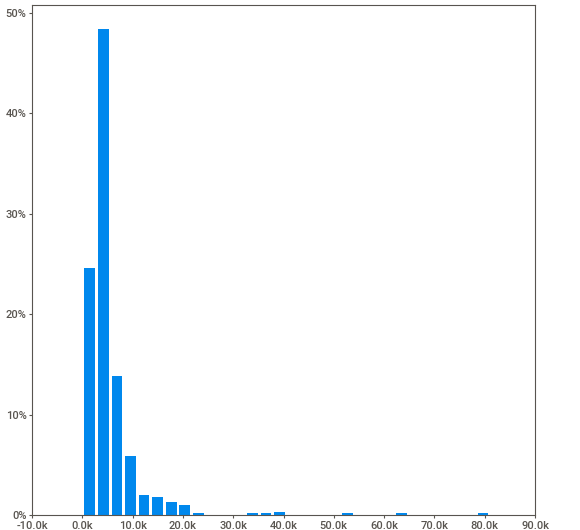
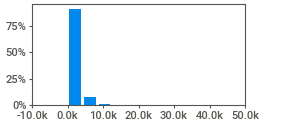
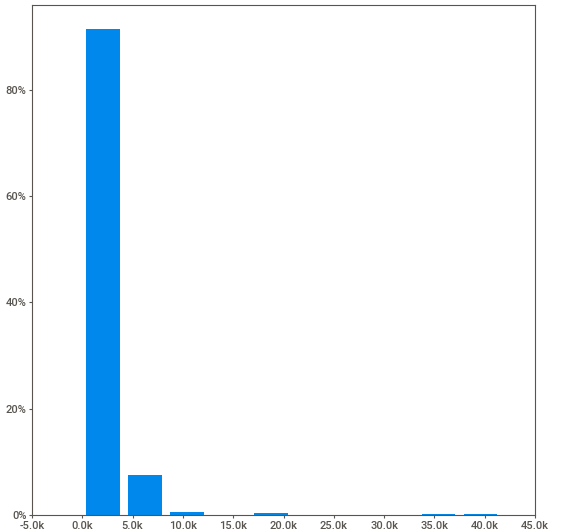
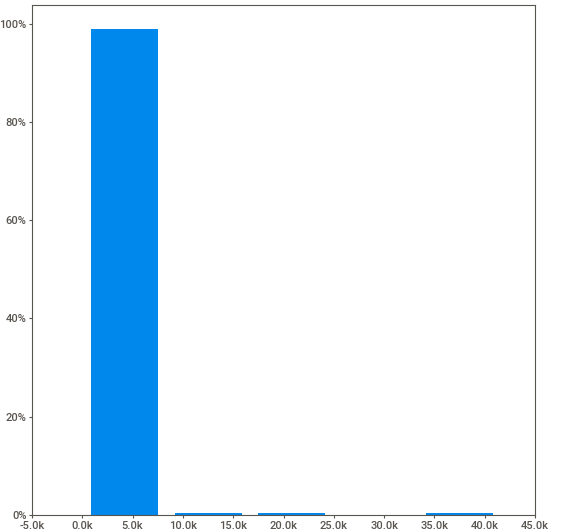
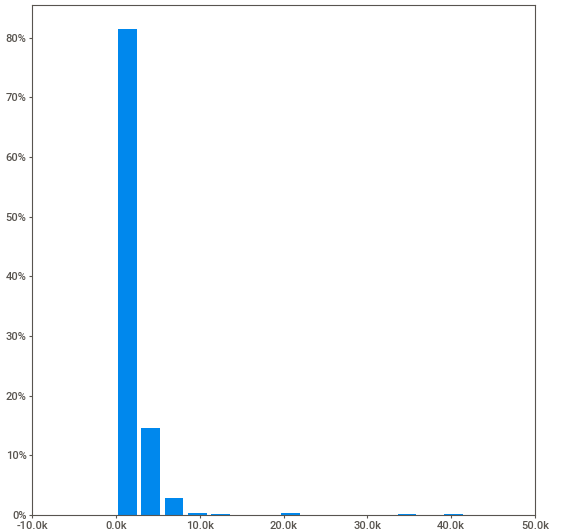
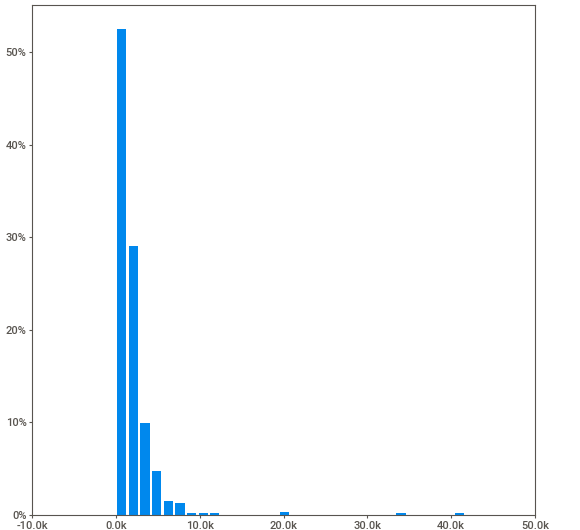
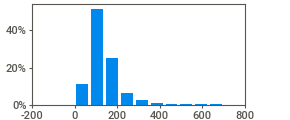
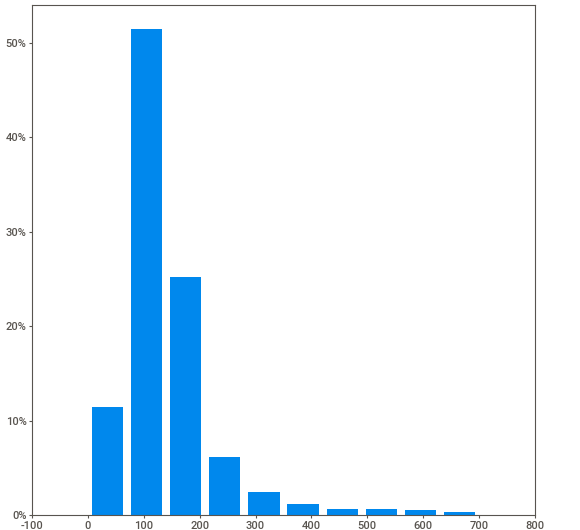
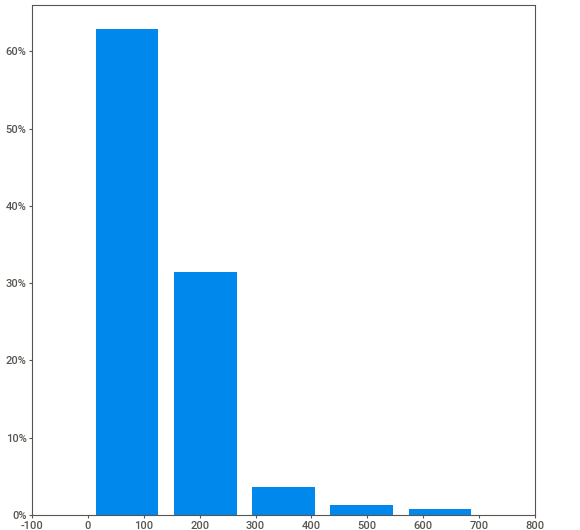
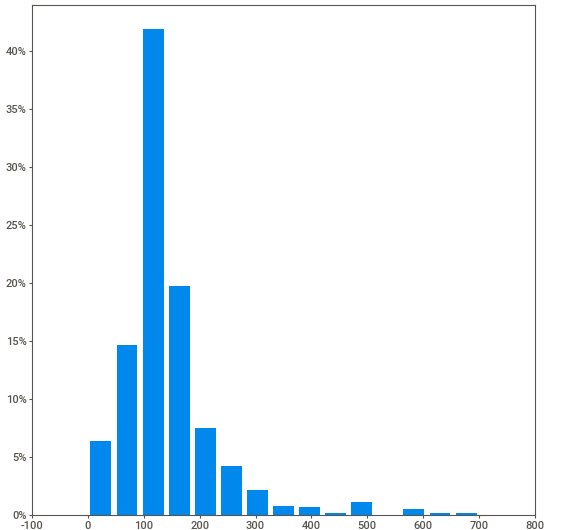
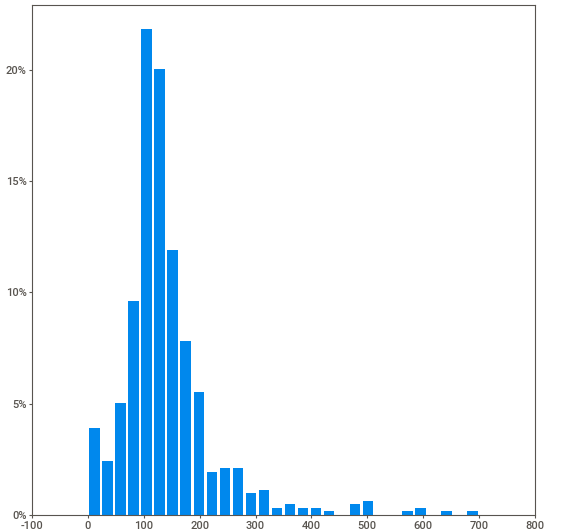
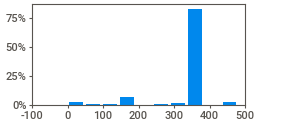
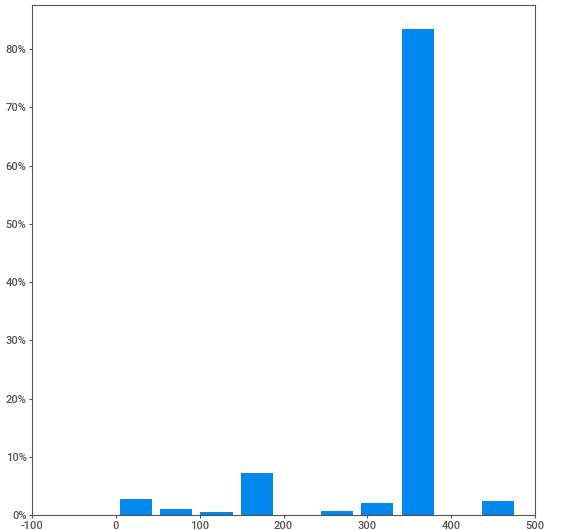
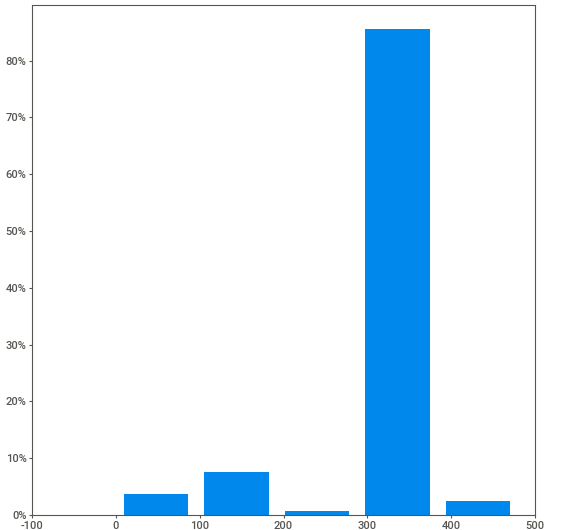
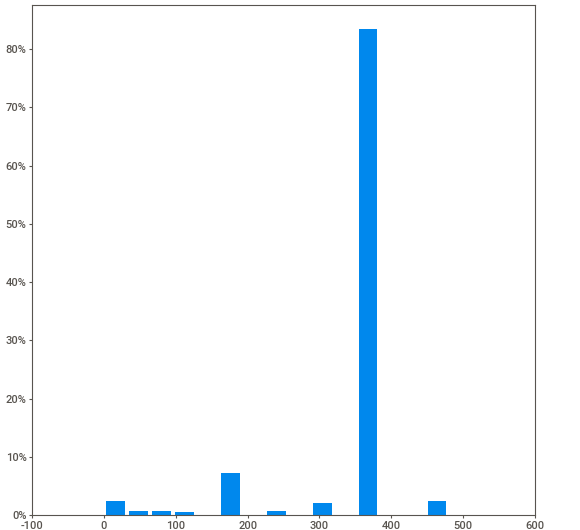
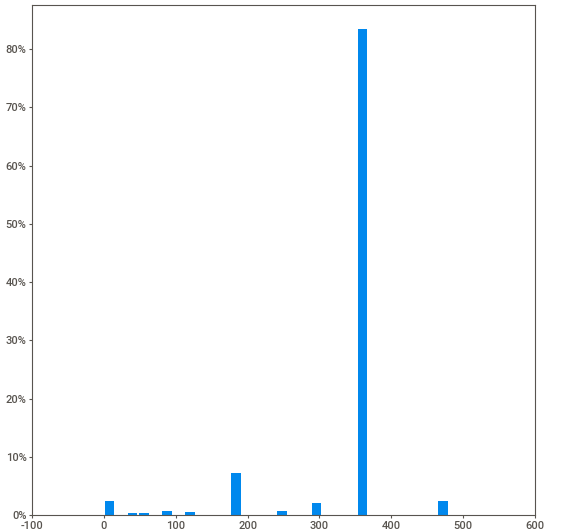
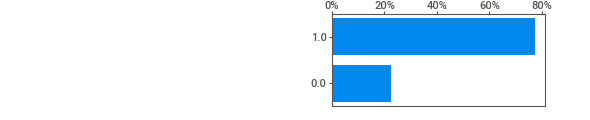
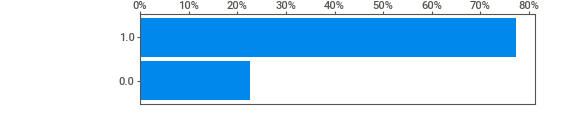
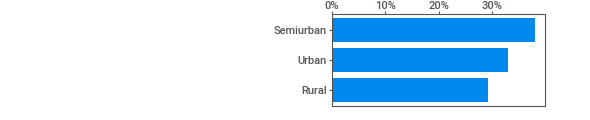
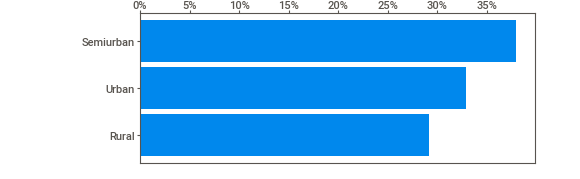
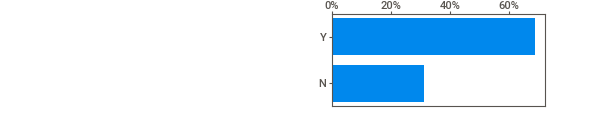
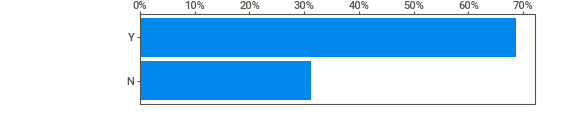
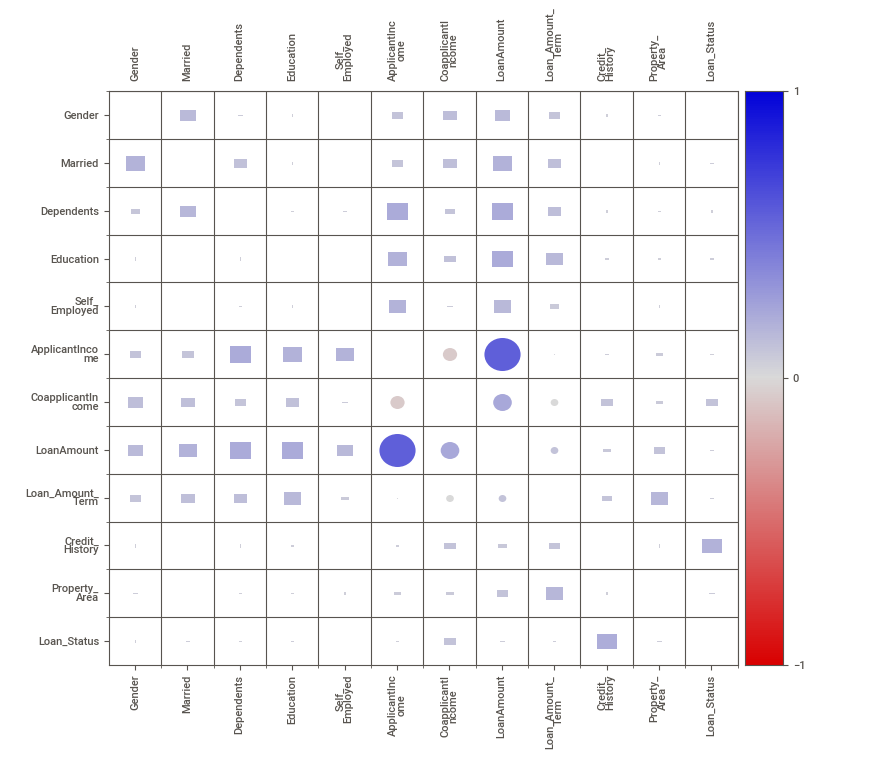
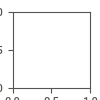

In [12]:
#report of every columns of dataset
import sweetviz as sw
report = sw.analyze(df)
report.show_notebook(layout='vertical')

In [13]:
#categorical data
categ=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

Y    422
N    192
Name: Loan_Status, dtype: int64

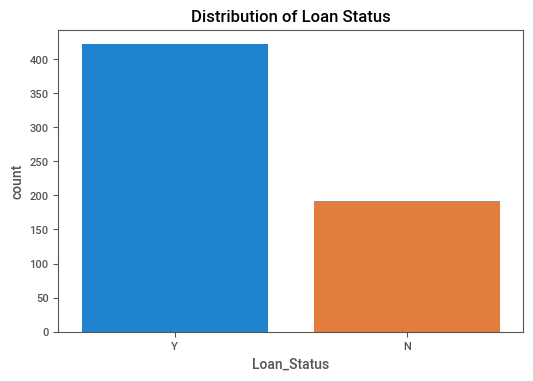

In [14]:
#Countplot of Loan Status
sns.countplot(x=df['Loan_Status'],data=df)
plt.title("Distribution of Loan Status")
df['Loan_Status'].value_counts()

69% are approved Loan and 31% are not approved Loan 

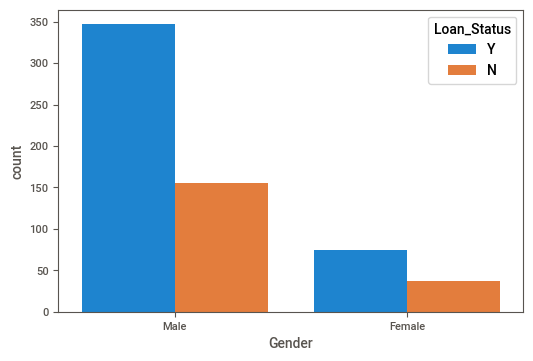

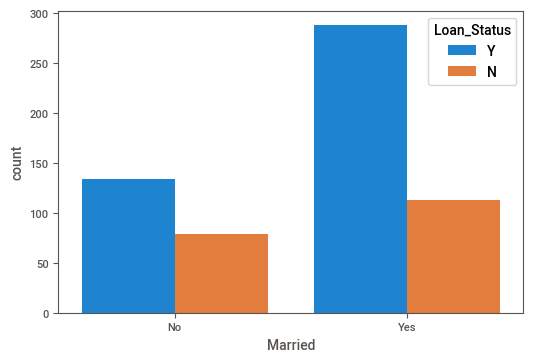

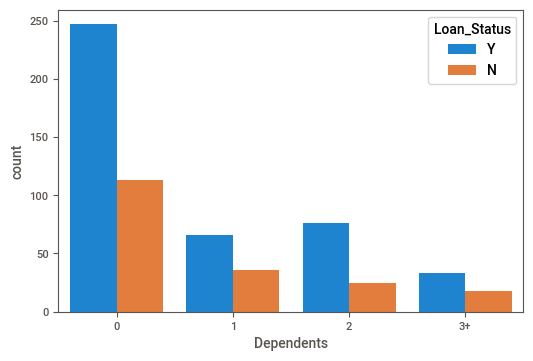

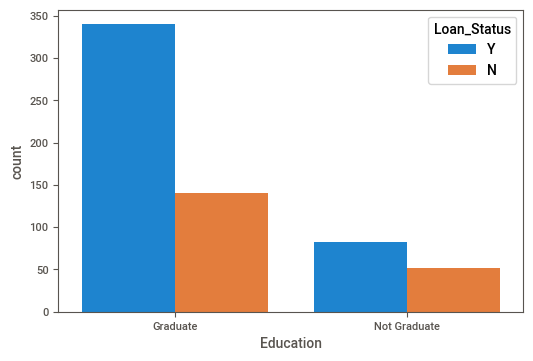

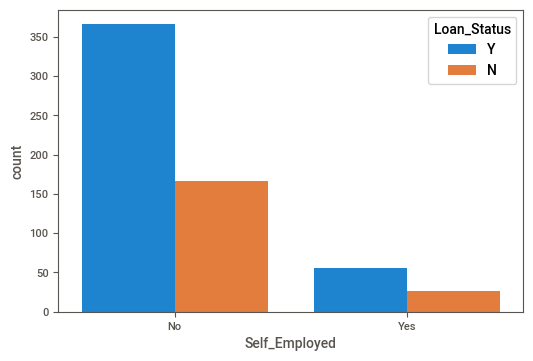

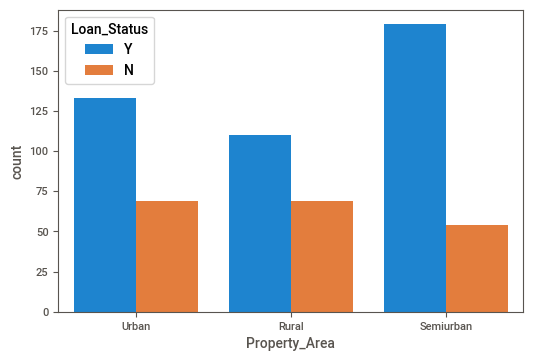

In [15]:
for i in categ:
    sns.countplot(x=i,hue='Loan_Status',data=df)
    plt.show()

More number of males have approved loan than females
Married People are more approved loan
Those people have no dependents have more approval to loan.
Graduate people have more loan approve
Those people who are not self employed more approve of loan
semiurban more approve then urban


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

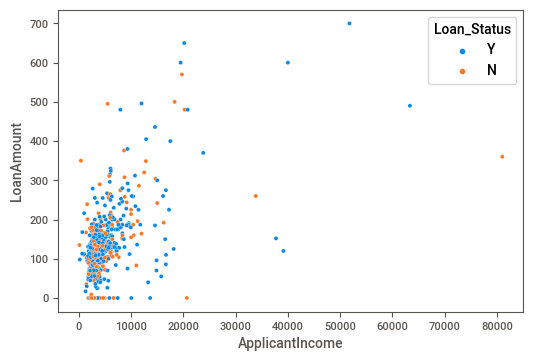

In [16]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=df)

Applicant income in between 0 to 10000 have more loan approval between 0 to 300 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

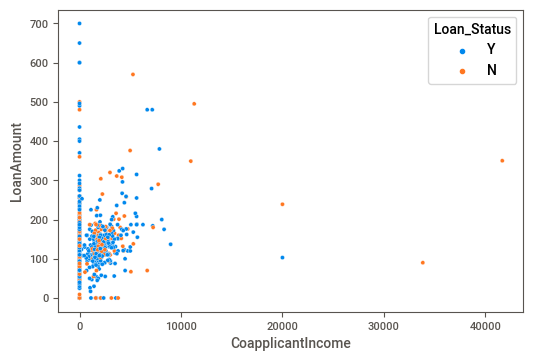

In [17]:
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',data=df)

Coapplicant Income are in between 0 to 10000: more loan approval of 0 to 300 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

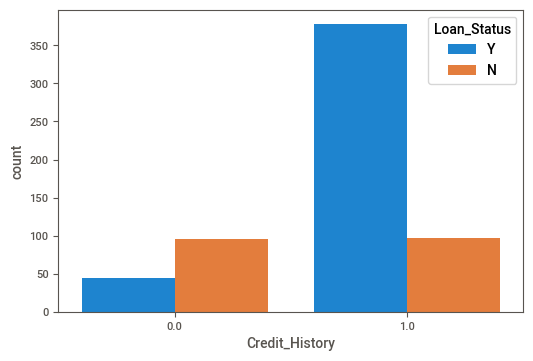

In [18]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

More people have credit history of repaying debt have loan approval

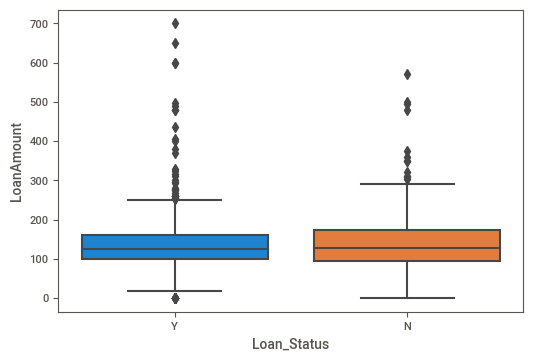

In [19]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df)
plt.show()

loan approval amount is in between 100 to 150 approax.
no approval for amount between 100 to 170 approax

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

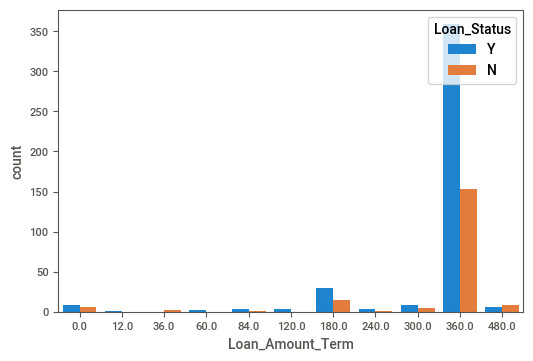

In [20]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

360 is maximum loan amount term for loan approval

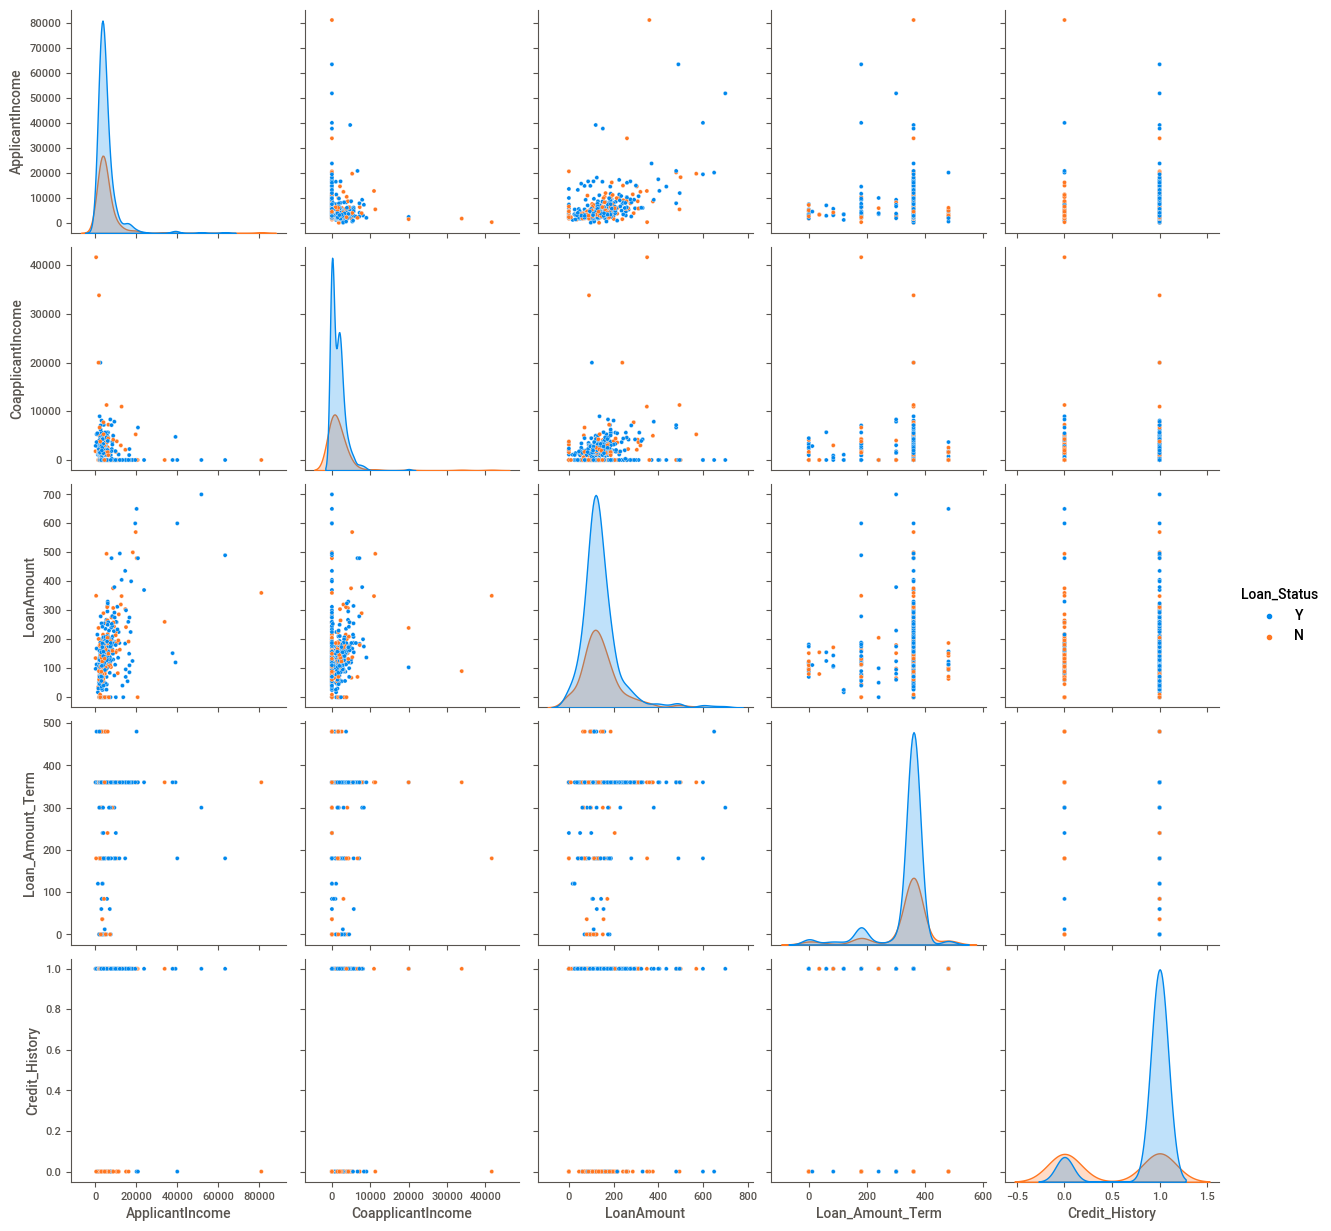

In [21]:
sns.pairplot(data=df,hue='Loan_Status')

In [22]:
# label encoding for changing categorical data into numerical data
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

<AxesSubplot:>

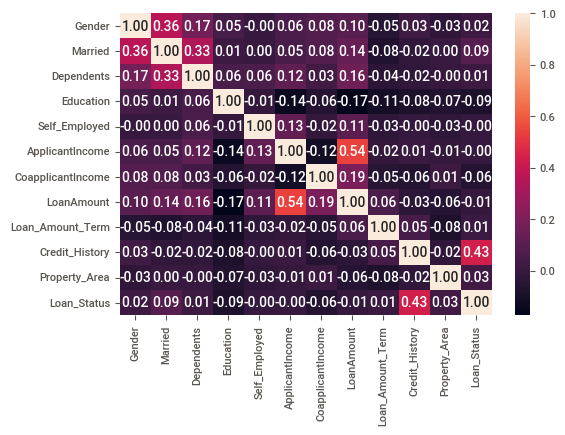

In [23]:
# correaltion between columns
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [24]:
#Feature engineering
x=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

In [25]:
#split the data into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=32)
print("xtrain shape:",xtrain.shape)
print("xtest shape:",xtest.shape)
print("ytrain shape:",ytrain.shape)
print("ytest shape:",ytest.shape)

xtrain shape: (491, 11)
xtest shape: (123, 11)
ytrain shape: (491,)
ytest shape: (123,)


In [26]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)
print('Accuracy: {:.2f}%'.format((accuracy_score(ytest,ypred))*100))
print("Confusion_matrix:\n",confusion_matrix(ytest,ypred))
print("Classification_report:\n",classification_report(ytest,ypred))

scores = cross_val_score(lg, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy: 74.80%
Confusion_matrix:
 [[17 24]
 [ 7 75]]
Classification_report:
               precision    recall  f1-score   support

           0       0.71      0.41      0.52        41
           1       0.76      0.91      0.83        82

    accuracy                           0.75       123
   macro avg       0.73      0.66      0.68       123
weighted avg       0.74      0.75      0.73       123

Scores: [0.79674797 0.7398374  0.71544715 0.77235772 0.79508197]
Mean score: 0.7638944422231108
Standard deviation: 0.03177899940937963


In [27]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
print('Accuracy: {:.2f}%'.format((accuracy_score(ytest,ypred))*100))
print("Confusion_matrix:\n",confusion_matrix(ytest,ypred))
print("Classification_report:\n",classification_report(ytest,ypred))

scores = cross_val_score(dtc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy: 65.04%
Confusion_matrix:
 [[15 26]
 [17 65]]
Classification_report:
               precision    recall  f1-score   support

           0       0.47      0.37      0.41        41
           1       0.71      0.79      0.75        82

    accuracy                           0.65       123
   macro avg       0.59      0.58      0.58       123
weighted avg       0.63      0.65      0.64       123

Scores: [0.6504065  0.65853659 0.66666667 0.68292683 0.67213115]
Mean score: 0.6661335465813675
Standard deviation: 0.011165334421498477


In [28]:
# Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
print('Accuracy: {:.2f}%'.format((accuracy_score(ytest,ypred))*100))
print("Confusion_matrix:\n",confusion_matrix(ytest,ypred))
print("Classification_report:\n",classification_report(ytest,ypred))

scores = cross_val_score(rfc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy: 74.80%
Confusion_matrix:
 [[19 22]
 [ 9 73]]
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.46      0.55        41
           1       0.77      0.89      0.82        82

    accuracy                           0.75       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123

Scores: [0.75609756 0.71544715 0.71544715 0.73170732 0.75409836]
Mean score: 0.7345595095295215
Standard deviation: 0.017800862883350282


In [29]:
#Gradient Boosting Classifier
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
print('Accuracy: {:.2f}%'.format((accuracy_score(ytest,ypred))*100))
print("Confusion_matrix:\n",confusion_matrix(ytest,ypred))
print("Classification_report:\n",classification_report(ytest,ypred))

scores = cross_val_score(gbc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy: 74.80%
Confusion_matrix:
 [[20 21]
 [10 72]]
Classification_report:
               precision    recall  f1-score   support

           0       0.67      0.49      0.56        41
           1       0.77      0.88      0.82        82

    accuracy                           0.75       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.74      0.75      0.74       123

Scores: [0.73170732 0.69105691 0.73170732 0.75609756 0.76229508]
Mean score: 0.7345728375316539
Standard deviation: 0.02506748838750894


In [30]:
#support Vector Classifier
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)
print('Accuracy: {:.2f}%'.format((accuracy_score(ytest,ypred))*100))
print("Confusion_matrix:\n",confusion_matrix(ytest,ypred))
print("Classification_report:\n",classification_report(ytest,ypred))

scores = cross_val_score(svc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy: 65.85%
Confusion_matrix:
 [[ 0 41]
 [ 1 81]]
Classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.66      0.99      0.79        82

    accuracy                           0.66       123
   macro avg       0.33      0.49      0.40       123
weighted avg       0.44      0.66      0.53       123

Scores: [0.69105691 0.69105691 0.68292683 0.68292683 0.68852459]
Mean score: 0.6872984139677463
Standard deviation: 0.0036872105184800976


Highest accuracy is 74.8%.Logistic Regression, Random Forest Classifier and Gradient Boosting Classifier have same accuracy but different precision.
Logistic Regression have highest precision. So, Logistic Regression is best model for prediction of more accurate data.

# HyperParameter Tuning

In [31]:
#hyperparameters grid to search
param_grid = [    
    {'penalty' : [ 'l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [32]:
clf = GridSearchCV(lg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [33]:
best_clf = clf.fit(x,y)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


In [34]:
best_clf.best_estimator_

LogisticRegression(C=0.0001)

In [35]:
print (f'Accuracy:  {best_clf.score(x,y):.3f}')

Accuracy:  0.687


# Save the Model

In [36]:
# save the model to disk
filename = 'logistic_model.sav'
joblib.dump(lg, filename)

# load the model from disk
loaded_model = joblib.load(filename)

# make predictions using the loaded model
ypred = loaded_model.predict(xtest)

In [37]:
#show the predicted data
data=pd.DataFrame({'Loan Status':ytest,'Predicted Loan Status':ypred},columns=['Loan Status','Predicted Loan Status'])
data

,Loan Status,Predicted Loan Status
51,1,1
19,1,1
494,0,0
612,1,1
188,1,1
237,1,0
300,0,0
193,1,1
195,0,1
365,0,1


# SUMMARY

Loan Application Status Prediction

This Dataset have details of applicants and we have to build model to predict whether the loan of the applicant will be approved(Loan_Status) or not.


Load the dataset in df.df has 614 rows and 13 columns.
 Null data in few columns are Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.
Null categorical data fill with mode and numerical data with 0 value.
df has 13 columns where 8 are categorical and 4 are numerical
EDA: Explore each columns and get some insights
-Loan_ID has 614 distinct values 
-Gender column have 82% male data and 18% female data
-Married column have 65% married people and 35% unmarried people
-Dependents columns have 4 categories 0 dependent(59%),1 dependent(17%),2 Dependents(16%) and 3+ dependents(8%) data.
-Education column have 2 categories Graduate (78%) and not Graduate(22%)
-Self_Employed column: 13% Self employed people and 87%  not self_employed people
-Property_Area column: 38% Semiurban ,33% Urban, 29% Rural
-Loan_Status:69% loan approved and 31% loan not approved

-Male member get more loan approval.Married People get more loan approval. 
-0 Dependent get more loan approval than 1,2,3+ dependents
-Graduate get more loan approval
-No Self employed people get more loan approval
-Property_area in Semiurban get more loan approval
- ApplicantIncome in between 0 to 10000 have more loan approval between 0 to 300
-Coapplicant Income are in between 0 to 10000: more loan approval of 0 to 300
-People who have credit history of repaying debt on time get more loan approval
-loan approval amount is in between 100 to 150 approax. no approval for amount between 100 to 170 approax
-360 is maximum loan amount term for loan approval


using labelencoder change the categorical data into numerical data
Use 5 Algorithms in this dataset areLogistic regression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier and supportvectormachine
LogisticRegression,RandomForestClassifier and GradientBoostingClassifier have same 74.8% accuracy but Logistic regression has high precision value.
LogisticRegression is the model for this dataset to predict the model
Hyperparameter tuning of LogisticRegression gave accuracy of 68.7%
save the model usinhg joblib library
data has loan status and predicted loan status data
 